# Fig 3 - yield/econ by dose and host strength

Heatmap:
- x host strength
- y dose
- z cumulative yield/cumulative econ

At N = 10 (or something else)

N sprays = 1, 2, 3

FIG
6 panels (3x2) with N sprays, fig host strength, same for host variance in appendix

## Required data:

Figure 3 needs df based on scan over:

`Sprays = 1,2,3`

`doses = 0.1,0.2,...,1`

`host_mu = 0.05,0.1,...,1`

`years=0,1,...,15`

With columns:

- `host_mu`
- `sprays`
- `dose`
- `year`
- `sev`
- `yld`
- `econ`

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px




from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    my_colorbar_subplot,
    get_text_annotation,
)

# from poly2.utils import get_dist_mean, edge_values
# from poly2.run import simulations_run, no_joblib_simulations_run
# from poly2.config import Config

In [6]:
COLZ = sns.color_palette('muted').as_hex()

# Plot

In [2]:
df_in = (
    pd.read_csv('../outputs/combined/fig3/fig3.csv')
    .drop(['Unnamed: 0', 'sev'], axis=1)
)

df_in.head()

NameError: name 'pd' is not defined

In [78]:
df_use = (
    df_in
    .join(
        df_in
        .drop('year', axis=1)
        .groupby(['host_mu', 'sprays', 'dose'])
        .cumsum()
        .rename(columns=lambda x: 'cum_' + str(x))
    )
    .loc[lambda df: df.year==10]
    .reset_index(drop=True)
)       

df_use

,host_mu,sprays,dose,year,yld,econ,cum_yld,cum_econ
0,0.05,1,0.1,10,9.862448,1142.047181,102.160600,11834.692742
1,0.05,2,0.1,10,10.059371,1151.874736,103.262524,11831.372059
2,0.05,3,0.1,10,10.132554,1147.207356,103.723481,11752.968606
3,0.05,1,0.2,10,10.034872,1159.004869,103.092739,11911.483471
4,0.05,2,0.2,10,10.210383,1163.084269,104.220810,11878.825731
...,...,...,...,...,...,...,...,...
565,0.95,2,0.9,10,9.899736,1081.335054,102.803603,11259.214018
566,0.95,3,0.9,10,9.885815,1040.544400,102.778548,10864.679151
567,0.95,1,1.0,10,9.965003,1124.900491,102.205132,11548.309124
568,0.95,2,1.0,10,9.906103,1075.600861,102.900952,11205.817571


In [136]:
df_use.describe().loc[['min', 'max'], ['cum_yld', 'cum_econ']]

,cum_yld,cum_econ
min,95.527654,10775.110752
max,105.609503,11952.281418


Use this for `zmin`, `zmax`

## Fig fn

In [160]:
def fig3(df):
    
    fig = make_subplots(
        rows=2,
        cols=3,
        shared_xaxes=True,
        shared_yaxes=True,
        # horizontal_spacing=0.14,
        # vertical_spacing=0.12,
    )
    
    LENGTH = 0.4
    
    bds = df.describe().loc[['min', 'max'], ['cum_yld', 'cum_econ']]
    
    
    for spray in [1,2,3]:
        by_spray = df.loc[df.sprays==spray]
        
        cbar_y = my_colorbar_subplot("Yield (ton/ha)", 1.02, 0.82, LENGTH)
        cbar_e = my_colorbar_subplot("Profit (£)", 1.02, 0.25, LENGTH)
        
        if spray==1:    
            showsc = True
        else:
            showsc = False


        ty = go.Heatmap(
                x=by_spray.host_mu,
                y=by_spray.dose,
                z=by_spray.cum_yld,
                showscale=showsc,
                colorbar=cbar_y,
                zmin=bds.loc['min', 'cum_yld'],
                zmax=bds.loc['max', 'cum_yld'],
        )

        fig.add_trace(ty, row=1, col=spray)
        
        te = go.Heatmap(
                x=by_spray.host_mu,
                y=by_spray.dose,
                z=by_spray.cum_econ,
                showscale=showsc,
                colorbar=cbar_e,
                zmin=bds.loc['min', 'cum_econ'],
                zmax=bds.loc['max', 'cum_econ'],
        )

        fig.add_trace(te, row=2, col=spray)
            
            
    
    
    
    
    
    fig.update_layout(standard_layout(True, height=500))
    
    corners = corner_annotations_rowwise(
        2, 3,
        1.1, -0.01,
        0.58, 0.36
    )
    
    annotz = corners + [
        get_text_annotation(
            0.12, 1.12,
            '1 spray',
            xanchor='center',
            yanchor='middle',
        ),
        get_text_annotation(
            0.5, 1.12,
            '2 sprays',
            xanchor='center',
            yanchor='middle',
        ),
        get_text_annotation(
            0.85, 1.12,
            '3 sprays',
            xanchor='center',
            yanchor='middle',
        ),
    ]
    
    fig.update_layout(annotations=annotz)
    
    # X axis    
    xrange = [0,1]
    fig.update_xaxes(#title_text='Initial host mean',
                     row=2, col=1,
                     range=xrange,
                     showgrid=False)
    
    fig.update_xaxes(title_text='Initial host mean',
                     row=2, col=2,
                     range=xrange,
                     showgrid=False)
    
    fig.update_xaxes(#title_text='Initial host mean',
                     row=2, col=3,
                     range=xrange,
                     showgrid=False)
    
    
    # Y axis    
    yrange = [0, 1]
    
    fig.update_yaxes(title_text='Dose',
                     row=1, col=1,
                     range=yrange,
                     showgrid=False)
    
    fig.update_yaxes(title_text='Dose',
                     row=2, col=1,
                     range=yrange,
                     showgrid=False)

    return fig

## FIG

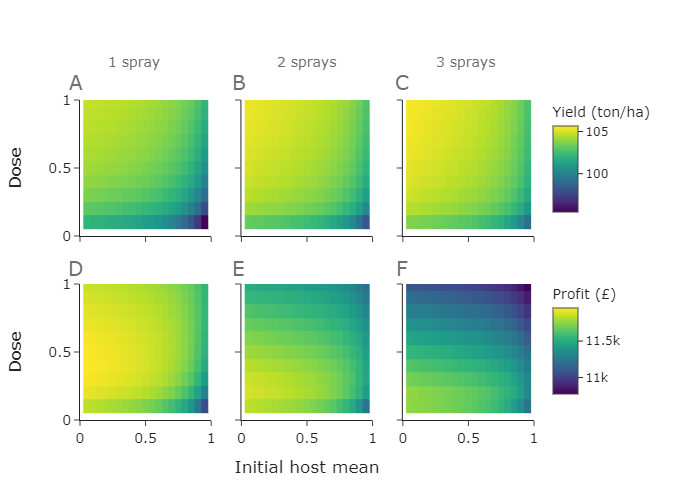

In [161]:
f = fig3(df_use)

f.show()

In [162]:
f.write_image('../figures/paper/fig3.png')